In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
# Importing the files
case_file_1 = pd.read_csv("/content/drive/MyDrive/Bike_share/2020_07_tripdata.csv")
case_file_2 = pd.read_csv("/content/drive/MyDrive/Bike_share/2020_08_tripdata.csv")
case_file_3 = pd.read_csv("/content/drive/MyDrive/Bike_share/2020_09_tripdata.csv")
case_file_4 = pd.read_csv("/content/drive/MyDrive/Bike_share/2020_10_tripdata.csv")
case_file_5 = pd.read_csv("/content/drive/MyDrive/Bike_share/2020_11_tripdata.csv")
case_file_6 = pd.read_csv("/content/drive/MyDrive/Bike_share/2020_12_tripdata.csv")
case_file_7 = pd.read_csv("/content/drive/MyDrive/Bike_share/2021_01_tripdata.csv")
case_file_8 = pd.read_csv("/content/drive/MyDrive/Bike_share/2021_02_tripdata.csv")
case_file_9 = pd.read_csv("/content/drive/MyDrive/Bike_share/2021_03_tripdata.csv")
case_file_10 = pd.read_csv("/content/drive/MyDrive/Bike_share/2021_04_tripdata.csv")
case_file_11 = pd.read_csv("/content/drive/MyDrive/Bike_share/2021_05_tripdata.csv")
case_file_12 = pd.read_csv("/content/drive/MyDrive/Bike_share/2021_06_tripdata.csv")

In [4]:
# Merging all the dataframes into a single dataframe.

all_dfs = [case_file_1, case_file_2, case_file_3, case_file_4, case_file_5, case_file_6, case_file_7, case_file_8, case_file_9, case_file_10, case_file_11, case_file_12]
case_file = pd.concat(all_dfs)
df = case_file

In [5]:
# Reading the merged file

case_file_5000 = df
case_file_5000

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,762198876D69004D,docked_bike,2020-07-09 15:22:02,2020-07-09 15:25:52,Ritchie Ct & Banks St,180,Wells St & Evergreen Ave,291,41.906866,-87.626217,41.906724,-87.634830,member
1,BEC9C9FBA0D4CF1B,docked_bike,2020-07-24 23:56:30,2020-07-25 00:20:17,Halsted St & Roscoe St,299,Broadway & Ridge Ave,461,41.943670,-87.648950,41.984045,-87.660274,member
2,D2FD8EA432C77EC1,docked_bike,2020-07-08 19:49:07,2020-07-08 19:56:22,Lake Shore Dr & Diversey Pkwy,329,Clark St & Wellington Ave,156,41.932588,-87.636427,41.936497,-87.647539,casual
3,54AE594E20B35881,docked_bike,2020-07-17 19:06:42,2020-07-17 19:27:38,LaSalle St & Illinois St,181,Clark St & Armitage Ave,94,41.890762,-87.631697,41.918306,-87.636282,casual
4,54025FDC7440B56F,docked_bike,2020-07-04 10:39:57,2020-07-04 10:45:05,Lake Shore Dr & North Blvd,268,Clark St & Schiller St,301,41.911722,-87.626804,41.907993,-87.631501,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
729590,CB282292CCFCE74F,electric_bike,2021-06-14 00:17:31,2021-06-14 00:56:46,Wells St & Polk St,SL-011,NaN,NaN,41.872412,-87.633715,41.880000,-87.620000,casual
729591,47BD346FAFB9BE6D,classic_bike,2021-06-30 17:35:10,2021-06-30 17:43:20,Clark St & Chicago Ave,13303,Kingsbury St & Kinzie St,KA1503000043,41.896750,-87.630890,41.889177,-87.638506,member
729592,52467C23D17C6AFE,classic_bike,2021-06-13 19:24:30,2021-06-13 19:34:11,Indiana Ave & 26th St,TA1307000005,State St & 19th St,SL-013,41.845687,-87.622481,41.856594,-87.627542,member
729593,7DF6D74420D7D9E6,electric_bike,2021-06-08 15:44:28,2021-06-08 16:15:01,Clark St & Chicago Ave,13303,NaN,NaN,41.896485,-87.630608,41.940000,-87.710000,member


In [6]:
# To get information about the dataframe.
case_file_5000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4460151 entries, 0 to 729594
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 476.4+ MB


In [7]:
#To convert object data type of start_time and end_time columns into datetime data type
case_file_5000["start_time"] = pd.to_datetime(case_file_5000["started_at"])
case_file_5000["end_time"] = pd.to_datetime(case_file_5000["ended_at"])

In [8]:
#Adding new column - ride_length (ended_at - started_at) to calculate the time travelled
case_file_5000["ride_length"] = case_file_5000["end_time"] - case_file_5000["start_time"]
case_file_5000["ride_length"]

0        0 days 00:03:50
1        0 days 00:23:47
2        0 days 00:07:15
3        0 days 00:20:56
4        0 days 00:05:08
               ...      
729590   0 days 00:39:15
729591   0 days 00:08:10
729592   0 days 00:09:41
729593   0 days 00:30:33
729594   0 days 00:29:11
Name: ride_length, Length: 4460151, dtype: timedelta64[ns]

In [9]:
# To get the updated information about the changes made in the data type of dataframe.
case_file_5000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4460151 entries, 0 to 729594
Data columns (total 16 columns):
 #   Column              Dtype          
---  ------              -----          
 0   ride_id             object         
 1   rideable_type       object         
 2   started_at          object         
 3   ended_at            object         
 4   start_station_name  object         
 5   start_station_id    object         
 6   end_station_name    object         
 7   end_station_id      object         
 8   start_lat           float64        
 9   start_lng           float64        
 10  end_lat             float64        
 11  end_lng             float64        
 12  member_casual       object         
 13  start_time          datetime64[ns] 
 14  end_time            datetime64[ns] 
 15  ride_length         timedelta64[ns]
dtypes: datetime64[ns](2), float64(4), object(9), timedelta64[ns](1)
memory usage: 578.5+ MB


In [10]:
# Splitting and extracting the date from "started_at" column
case_file_5000["start_date1"] = [i.split(" ")[0] for i in case_file_5000["started_at"]]
case_file_5000["start_date1"]

0         2020-07-09
1         2020-07-24
2         2020-07-08
3         2020-07-17
4         2020-07-04
             ...    
729590    2021-06-14
729591    2021-06-30
729592    2021-06-13
729593    2021-06-08
729594    2021-06-03
Name: start_date1, Length: 4460151, dtype: object

In [11]:
# Converting start_date1 into datetime data type
case_file_5000["start_date1"] = pd.to_datetime(case_file_5000["start_date1"])

In [12]:
# Finding the weekday of the date
case_file_5000['week_day'] = case_file_5000["start_date1"].apply(lambda x: x.weekday())
case_file_5000['week_day'].unique()

array([3, 4, 2, 5, 1, 0, 6])

In [13]:
# Converting weekday values into weekday
dict1 = {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}
case_file_5000['week_day'] = case_file_5000['week_day'].apply(lambda y: dict1[y])
case_file_5000['week_day']

0         Wednesday
1          Thursday
2           Tuesday
3          Thursday
4            Friday
            ...    
729590       Sunday
729591      Tuesday
729592     Saturday
729593       Monday
729594    Wednesday
Name: week_day, Length: 4460151, dtype: object

In [14]:
# To sort the dataframe by start date in ascending order
case_file_5000.sort_values(by=['started_at'], inplace=True, ascending=True)

In [15]:
# Drop all rows with any NaN values
case_file_5000_cleaned = case_file_5000.dropna()

In [16]:
# To save the cleaned file for further transformation of data
case_file_5000_cleaned.to_csv('cleaned.csv')

In [17]:
# To import the cleaned data file
cleaned_file = pd.read_csv("cleaned.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [18]:
# Print the cleaned dataframe
cleaned_file

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_time,end_time,ride_length,start_date1,week_day
0,275150,C66CC4DD911DDFBD,docked_bike,2020-07-01 00:00:14,2020-07-01 01:28:12,Buckingham Fountain,2,Buckingham Fountain,2,41.876511,-87.620548,41.876511,-87.620548,casual,2020-07-01 00:00:14,2020-07-01 01:28:12,0 days 01:27:58,2020-07-01 00:00:00,Tuesday
1,259045,BD6363747C00FAD3,docked_bike,2020-07-01 00:00:15,2020-07-01 02:44:58,Wells St & Concord Ln,289,Clark St & Lake St,38,41.912133,-87.634656,41.886021,-87.630876,casual,2020-07-01 00:00:15,2020-07-01 02:44:58,0 days 02:44:43,2020-07-01 00:00:00,Tuesday
2,236929,1856297CBD809E60,docked_bike,2020-07-01 00:00:49,2020-07-01 00:45:04,Wabash Ave & Wacker Pl,194,Wabash Ave & Wacker Pl,194,41.886875,-87.626030,41.886875,-87.626030,casual,2020-07-01 00:00:49,2020-07-01 00:45:04,0 days 00:44:15,2020-07-01 00:00:00,Tuesday
3,217019,06B27D89815F5031,docked_bike,2020-07-01 00:00:50,2020-07-01 02:52:16,Wells St & Concord Ln,289,Clark St & Lake St,38,41.912133,-87.634656,41.886021,-87.630876,casual,2020-07-01 00:00:50,2020-07-01 02:52:16,0 days 02:51:26,2020-07-01 00:00:00,Tuesday
4,195188,7F17B8FF6F418A7F,docked_bike,2020-07-01 00:01:11,2020-07-01 00:08:03,State St & 33rd St,148,MLK Jr Dr & 29th St,237,41.834734,-87.625813,41.842052,-87.617000,member,2020-07-01 00:01:11,2020-07-01 00:08:03,0 days 00:06:52,2020-07-01 00:00:00,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4025498,675978,E25F3A2D6AF8F001,classic_bike,2021-06-30 23:59:15,2021-07-01 00:06:09,Calumet Ave & 18th St,13102,Wabash Ave & Roosevelt Rd,TA1305000002,41.857611,-87.619407,41.867227,-87.625961,casual,2021-06-30 23:59:15,2021-07-01 00:06:09,0 days 00:06:54,2021-06-30 00:00:00,Tuesday
4025499,582358,F67C4ACB3CCEC518,classic_bike,2021-06-30 23:59:16,2021-07-01 00:04:21,Ashland Ave & Chicago Ave,13247,Damen Ave & Thomas St (Augusta Blvd),TA1307000070,41.895966,-87.667747,41.901315,-87.677409,casual,2021-06-30 23:59:16,2021-07-01 00:04:21,0 days 00:05:05,2021-06-30 00:00:00,Tuesday
4025500,16931,B6A748160720820F,classic_bike,2021-06-30 23:59:26,2021-07-01 00:06:11,Calumet Ave & 18th St,13102,Wabash Ave & Roosevelt Rd,TA1305000002,41.857611,-87.619407,41.867227,-87.625961,member,2021-06-30 23:59:26,2021-07-01 00:06:11,0 days 00:06:45,2021-06-30 00:00:00,Tuesday
4025501,626434,5F69DFB0122DC3D8,classic_bike,2021-06-30 23:59:35,2021-07-01 00:27:54,Michigan Ave & Lake St,TA1305000011,Wabash Ave & Wacker Pl,TA1307000131,41.886024,-87.624117,41.886875,-87.626030,casual,2021-06-30 23:59:35,2021-07-01 00:27:54,0 days 00:28:19,2021-06-30 00:00:00,Tuesday


In [19]:
# To calculate euclidean distance between start and end point.
cleaned_file["x"] = (cleaned_file["end_lat"] - cleaned_file["start_lat"])**2
cleaned_file["y"] = (cleaned_file["end_lng"] - cleaned_file["start_lng"])**2
cleaned_file["distance"] = (cleaned_file["x"] + cleaned_file["y"])**(1/2)
cleaned_file["distance"]

0          2.290298e-07
1          2.638434e-02
2          0.000000e+00
3          2.638434e-02
4          1.145522e-02
               ...     
4025498    1.163711e-02
4025499    1.104382e-02
4025500    1.163711e-02
4025501    2.093745e-03
4025502    7.064478e-02
Name: distance, Length: 4025503, dtype: float64

In [20]:
# To extract year and month from start date column
cleaned_file['year'] = pd.DatetimeIndex(cleaned_file["start_date1"]).year
cleaned_file['month'] = pd.DatetimeIndex(cleaned_file["start_date1"]).month

In [21]:
# To convert object datatype to timedelta
cleaned_file["ride_len"] = pd.to_timedelta(cleaned_file["ride_length"])

In [22]:
# Print the cleaned dataframe
cleaned_file

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_time,end_time,ride_length,start_date1,week_day,x,y,distance,year,month,ride_len
0,275150,C66CC4DD911DDFBD,docked_bike,2020-07-01 00:00:14,2020-07-01 01:28:12,Buckingham Fountain,2,Buckingham Fountain,2,41.876511,-87.620548,41.876511,-87.620548,casual,2020-07-01 00:00:14,2020-07-01 01:28:12,0 days 01:27:58,2020-07-01 00:00:00,Tuesday,5.235720e-14,9.746473e-17,2.290298e-07,2020,7,0 days 01:27:58
1,259045,BD6363747C00FAD3,docked_bike,2020-07-01 00:00:15,2020-07-01 02:44:58,Wells St & Concord Ln,289,Clark St & Lake St,38,41.912133,-87.634656,41.886021,-87.630876,casual,2020-07-01 00:00:15,2020-07-01 02:44:58,0 days 02:44:43,2020-07-01 00:00:00,Tuesday,6.818455e-04,1.428796e-05,2.638434e-02,2020,7,0 days 02:44:43
2,236929,1856297CBD809E60,docked_bike,2020-07-01 00:00:49,2020-07-01 00:45:04,Wabash Ave & Wacker Pl,194,Wabash Ave & Wacker Pl,194,41.886875,-87.626030,41.886875,-87.626030,casual,2020-07-01 00:00:49,2020-07-01 00:45:04,0 days 00:44:15,2020-07-01 00:00:00,Tuesday,0.000000e+00,0.000000e+00,0.000000e+00,2020,7,0 days 00:44:15
3,217019,06B27D89815F5031,docked_bike,2020-07-01 00:00:50,2020-07-01 02:52:16,Wells St & Concord Ln,289,Clark St & Lake St,38,41.912133,-87.634656,41.886021,-87.630876,casual,2020-07-01 00:00:50,2020-07-01 02:52:16,0 days 02:51:26,2020-07-01 00:00:00,Tuesday,6.818455e-04,1.428796e-05,2.638434e-02,2020,7,0 days 02:51:26
4,195188,7F17B8FF6F418A7F,docked_bike,2020-07-01 00:01:11,2020-07-01 00:08:03,State St & 33rd St,148,MLK Jr Dr & 29th St,237,41.834734,-87.625813,41.842052,-87.617000,member,2020-07-01 00:01:11,2020-07-01 00:08:03,0 days 00:06:52,2020-07-01 00:00:00,Tuesday,5.355312e-05,7.766897e-05,1.145522e-02,2020,7,0 days 00:06:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4025498,675978,E25F3A2D6AF8F001,classic_bike,2021-06-30 23:59:15,2021-07-01 00:06:09,Calumet Ave & 18th St,13102,Wabash Ave & Roosevelt Rd,TA1305000002,41.857611,-87.619407,41.867227,-87.625961,casual,2021-06-30 23:59:15,2021-07-01 00:06:09,0 days 00:06:54,2021-06-30 00:00:00,Tuesday,9.246746e-05,4.295492e-05,1.163711e-02,2021,6,0 days 00:06:54
4025499,582358,F67C4ACB3CCEC518,classic_bike,2021-06-30 23:59:16,2021-07-01 00:04:21,Ashland Ave & Chicago Ave,13247,Damen Ave & Thomas St (Augusta Blvd),TA1307000070,41.895966,-87.667747,41.901315,-87.677409,casual,2021-06-30 23:59:16,2021-07-01 00:04:21,0 days 00:05:05,2021-06-30 00:00:00,Tuesday,2.861180e-05,9.335424e-05,1.104382e-02,2021,6,0 days 00:05:05
4025500,16931,B6A748160720820F,classic_bike,2021-06-30 23:59:26,2021-07-01 00:06:11,Calumet Ave & 18th St,13102,Wabash Ave & Roosevelt Rd,TA1305000002,41.857611,-87.619407,41.867227,-87.625961,member,2021-06-30 23:59:26,2021-07-01 00:06:11,0 days 00:06:45,2021-06-30 00:00:00,Tuesday,9.246746e-05,4.295492e-05,1.163711e-02,2021,6,0 days 00:06:45
4025501,626434,5F69DFB0122DC3D8,classic_bike,2021-06-30 23:59:35,2021-07-01 00:27:54,Michigan Ave & Lake St,TA1305000011,Wabash Ave & Wacker Pl,TA1307000131,41.886024,-87.624117,41.886875,-87.626030,casual,2021-06-30 23:59:35,2021-07-01 00:27:54,0 days 00:28:19,2021-06-30 00:00:00,Tuesday,7.242010e-07,3.659569e-06,2.093745e-03,2021,6,0 days 00:28:19


In [23]:
# To check if there are null values in dataframe
cleaned_file.isnull().sum()

Unnamed: 0            0
ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
start_time            0
end_time              0
ride_length           0
start_date1           0
week_day              0
x                     0
y                     0
distance              0
year                  0
month                 0
ride_len              0
dtype: int64

In [24]:
# To check if there are any duplicate values in dataframe
cleaned_file.duplicated().any()

False

# Analysis

In [25]:
#To calculate mean of ride length of all types of users
mean_ride_length = cleaned_file["ride_len"].mean()
mean_ride_length

Timedelta('0 days 00:24:09.360428994')

In [26]:
# Calculate the max ride_length of all types of users
max_ride_length = cleaned_file["ride_len"].max()
max_ride_length

Timedelta('38 days 20:24:09')

In [27]:
# To calculate mean ride length for member
mean_ride_length_member = cleaned_file[cleaned_file["member_casual"] == "member"]
mean_ride_length_member = mean_ride_length_member["ride_len"].mean()
mean_ride_length_member

Timedelta('0 days 00:11:35.488927758')

In [28]:
# To calculate mean ride length for casual riders
mean_ride_length_casual = cleaned_file[cleaned_file["member_casual"] == "casual"]
mean_ride_length_casual = mean_ride_length_casual["ride_len"].mean()
mean_ride_length_casual

Timedelta('0 days 00:40:51.870952414')

In [29]:
# To calculate max ride length for member
max_ride_length_member = cleaned_file[cleaned_file["member_casual"] == "member"]
max_ride_length_member = max_ride_length_member["ride_len"].max()
max_ride_length_member

Timedelta('23 days 05:01:22')

In [30]:
# To calculate max ride length for casual riders
max_ride_length_casual = cleaned_file[cleaned_file["member_casual"] == "casual"]
max_ride_length_casual = max_ride_length_casual["ride_len"].max()
max_ride_length_casual

Timedelta('38 days 20:24:09')

In [31]:
# Calculate the mode of week_day for all types of users
mode_week_day = cleaned_file["week_day"].mode()
mode_week_day

0    Friday
dtype: object

In [32]:
# To calculate mode of week_day for member
mode_week_day_member = cleaned_file[cleaned_file["member_casual"] == "member"]
mode_week_day_member = mode_week_day_member["week_day"].mode()
mode_week_day_member

0    Tuesday
dtype: object

In [33]:
# To calculate mode of week_day for casual
mode_week_day_casual = cleaned_file[cleaned_file["member_casual"] == "casual"]
mode_week_day_casual = mode_week_day_casual["week_day"].mode()
mode_week_day_casual

0    Friday
dtype: object

In [34]:
# Calculate the number of rides for users by week_day by adding Count of ride_id to Values
dict1 = {"Sunday": 0, "Monday": 1, "Tuesday": 2, "Wednesday": 3, "Thursday": 4, "Friday":5, "Saturday": 6}
cleaned_file['week_day'] = cleaned_file['week_day'].apply(lambda y: dict1[y])

count_users_week_day = cleaned_file.groupby('week_day')['ride_id'].count()
count_users_week_day = count_users_week_day.sort_index()
count_users_week_day

week_day
0    492594
1    511069
2    544916
3    518999
4    590976
5    740118
6    626831
Name: ride_id, dtype: int64

In [35]:
# Calculate the number of rides for member by week_day by adding Count of ride_id to Values
count_member_week_day = cleaned_file[cleaned_file["member_casual"] == "member"].groupby('week_day')['ride_id'].count()
count_member_week_day

week_day
0    306654
1    331260
2    354757
3    331126
4    340117
5    340617
6    293152
Name: ride_id, dtype: int64

In [36]:
# Calculate the number of rides for casual by week_day by adding Count of ride_id to Values
count_casual_week_day = cleaned_file[cleaned_file["member_casual"] == "casual"].groupby('week_day')['ride_id'].count()
count_casual_week_day

week_day
0    185940
1    179809
2    190159
3    187873
4    250859
5    399501
6    333679
Name: ride_id, dtype: int64

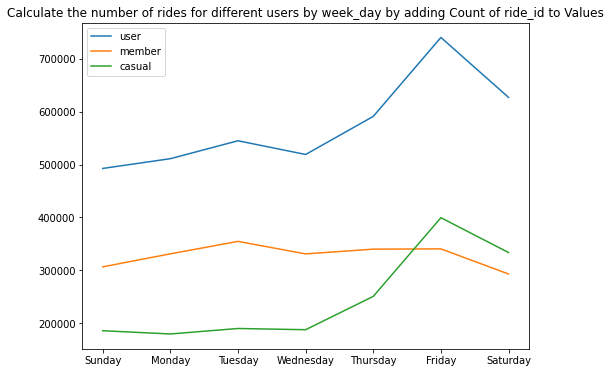

In [37]:
# To plot graph of Weekday Vs Number Of Rides
plt.figure(figsize = (8,6))
plt.plot(count_users_week_day.index, count_users_week_day.values)
plt.plot(count_member_week_day.index, count_member_week_day.values)
plt.plot(count_casual_week_day.index, count_casual_week_day.values)
plt.title("Calculate the number of rides for different users by week_day by adding Count of ride_id to Values")
plt.legend(["user", "member", "casual"])
labels = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
plt.xticks(count_casual_week_day.index, labels)
plt.show()

In [38]:
# Calculate the average ride_length for users by week_day
user_avg_ride_len_week_day = cleaned_file.groupby("week_day")['ride_len'].mean(numeric_only=False)
user_avg_ride_len_week_day

week_day
0   0 days 00:24:06.710595338
1   0 days 00:04:27.933680187
2   0 days 00:22:23.169934448
3   0 days 00:22:39.126884637
4   0 days 00:25:21.690127856
5   0 days 00:31:24.290038885
6   0 days 00:33:19.983402224
Name: ride_len, dtype: timedelta64[ns]

In [39]:
# Calculate the average ride_length for members by week_day
member_avg_ride_len_week_day = cleaned_file[cleaned_file["member_casual"] == "member"].groupby('week_day')['ride_len'].mean(numeric_only=False)
member_avg_ride_len_week_day

week_day
0     0 days 00:14:13.133508775
1   -1 days +23:51:37.289627483
2     0 days 00:14:01.688383879
3     0 days 00:13:58.298834884
4     0 days 00:14:32.475189420
5     0 days 00:16:19.305604241
6     0 days 00:16:51.198811538
Name: ride_len, dtype: timedelta64[ns]

In [40]:
# Calculate the average ride_length for casual by week_day
casual_avg_ride_len_week_day = cleaned_file[cleaned_file["member_casual"] == "casual"].groupby('week_day')['ride_len'].mean(numeric_only=False)
casual_avg_ride_len_week_day

week_day
0   0 days 00:40:25.643519414
1   0 days 00:28:07.682129370
2   0 days 00:37:58.724341209
3   0 days 00:37:57.085871838
4   0 days 00:40:01.901869177
5   0 days 00:44:15.885311926
6   0 days 00:47:48.675109911
Name: ride_len, dtype: timedelta64[ns]

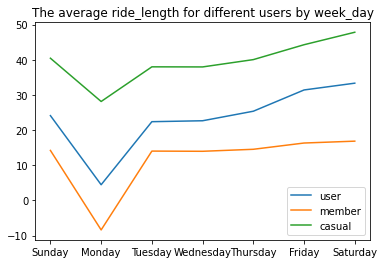

In [41]:
# To plot graph of Weekday Vs Average ride length
plt.plot(user_avg_ride_len_week_day/pd.Timedelta(minutes=1))
plt.plot(member_avg_ride_len_week_day/pd.Timedelta(minutes=1))
plt.plot(casual_avg_ride_len_week_day/pd.Timedelta(minutes=1))
plt.title("The average ride_length for different users by week_day")
plt.legend(["user", "member", "casual"])
labels = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
plt.xticks(user_avg_ride_len_week_day.index, labels)
plt.show()

In [42]:
cleaned_file

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_time,end_time,ride_length,start_date1,week_day,x,y,distance,year,month,ride_len
0,275150,C66CC4DD911DDFBD,docked_bike,2020-07-01 00:00:14,2020-07-01 01:28:12,Buckingham Fountain,2,Buckingham Fountain,2,41.876511,-87.620548,41.876511,-87.620548,casual,2020-07-01 00:00:14,2020-07-01 01:28:12,0 days 01:27:58,2020-07-01 00:00:00,2,5.235720e-14,9.746473e-17,2.290298e-07,2020,7,0 days 01:27:58
1,259045,BD6363747C00FAD3,docked_bike,2020-07-01 00:00:15,2020-07-01 02:44:58,Wells St & Concord Ln,289,Clark St & Lake St,38,41.912133,-87.634656,41.886021,-87.630876,casual,2020-07-01 00:00:15,2020-07-01 02:44:58,0 days 02:44:43,2020-07-01 00:00:00,2,6.818455e-04,1.428796e-05,2.638434e-02,2020,7,0 days 02:44:43
2,236929,1856297CBD809E60,docked_bike,2020-07-01 00:00:49,2020-07-01 00:45:04,Wabash Ave & Wacker Pl,194,Wabash Ave & Wacker Pl,194,41.886875,-87.626030,41.886875,-87.626030,casual,2020-07-01 00:00:49,2020-07-01 00:45:04,0 days 00:44:15,2020-07-01 00:00:00,2,0.000000e+00,0.000000e+00,0.000000e+00,2020,7,0 days 00:44:15
3,217019,06B27D89815F5031,docked_bike,2020-07-01 00:00:50,2020-07-01 02:52:16,Wells St & Concord Ln,289,Clark St & Lake St,38,41.912133,-87.634656,41.886021,-87.630876,casual,2020-07-01 00:00:50,2020-07-01 02:52:16,0 days 02:51:26,2020-07-01 00:00:00,2,6.818455e-04,1.428796e-05,2.638434e-02,2020,7,0 days 02:51:26
4,195188,7F17B8FF6F418A7F,docked_bike,2020-07-01 00:01:11,2020-07-01 00:08:03,State St & 33rd St,148,MLK Jr Dr & 29th St,237,41.834734,-87.625813,41.842052,-87.617000,member,2020-07-01 00:01:11,2020-07-01 00:08:03,0 days 00:06:52,2020-07-01 00:00:00,2,5.355312e-05,7.766897e-05,1.145522e-02,2020,7,0 days 00:06:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4025498,675978,E25F3A2D6AF8F001,classic_bike,2021-06-30 23:59:15,2021-07-01 00:06:09,Calumet Ave & 18th St,13102,Wabash Ave & Roosevelt Rd,TA1305000002,41.857611,-87.619407,41.867227,-87.625961,casual,2021-06-30 23:59:15,2021-07-01 00:06:09,0 days 00:06:54,2021-06-30 00:00:00,2,9.246746e-05,4.295492e-05,1.163711e-02,2021,6,0 days 00:06:54
4025499,582358,F67C4ACB3CCEC518,classic_bike,2021-06-30 23:59:16,2021-07-01 00:04:21,Ashland Ave & Chicago Ave,13247,Damen Ave & Thomas St (Augusta Blvd),TA1307000070,41.895966,-87.667747,41.901315,-87.677409,casual,2021-06-30 23:59:16,2021-07-01 00:04:21,0 days 00:05:05,2021-06-30 00:00:00,2,2.861180e-05,9.335424e-05,1.104382e-02,2021,6,0 days 00:05:05
4025500,16931,B6A748160720820F,classic_bike,2021-06-30 23:59:26,2021-07-01 00:06:11,Calumet Ave & 18th St,13102,Wabash Ave & Roosevelt Rd,TA1305000002,41.857611,-87.619407,41.867227,-87.625961,member,2021-06-30 23:59:26,2021-07-01 00:06:11,0 days 00:06:45,2021-06-30 00:00:00,2,9.246746e-05,4.295492e-05,1.163711e-02,2021,6,0 days 00:06:45
4025501,626434,5F69DFB0122DC3D8,classic_bike,2021-06-30 23:59:35,2021-07-01 00:27:54,Michigan Ave & Lake St,TA1305000011,Wabash Ave & Wacker Pl,TA1307000131,41.886024,-87.624117,41.886875,-87.626030,casual,2021-06-30 23:59:35,2021-07-01 00:27:54,0 days 00:28:19,2021-06-30 00:00:00,2,7.242010e-07,3.659569e-06,2.093745e-03,2021,6,0 days 00:28:19


In [43]:
# To extract important features of the dataframe into a new dataframe
final_file = cleaned_file[["ride_id", "rideable_type", "ride_len", "week_day", "distance", "year", "month", "member_casual"]]

In [44]:
# To get the information of the dataframe
final_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4025503 entries, 0 to 4025502
Data columns (total 8 columns):
 #   Column         Dtype          
---  ------         -----          
 0   ride_id        object         
 1   rideable_type  object         
 2   ride_len       timedelta64[ns]
 3   week_day       int64          
 4   distance       float64        
 5   year           int64          
 6   month          int64          
 7   member_casual  object         
dtypes: float64(1), int64(3), object(3), timedelta64[ns](1)
memory usage: 245.7+ MB


# data analysis

In [45]:
# To check the number of users in each type over past 12 months
member_type = final_file["member_casual"].value_counts()
member_type

member    2297683
casual    1727820
Name: member_casual, dtype: int64

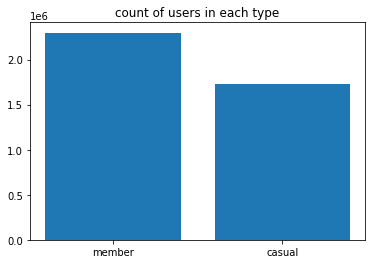

In [46]:
# To plot the count plot of users in each type
plt.title("count of users in each type")
plt.bar(member_type.index, member_type.values)
plt.show()

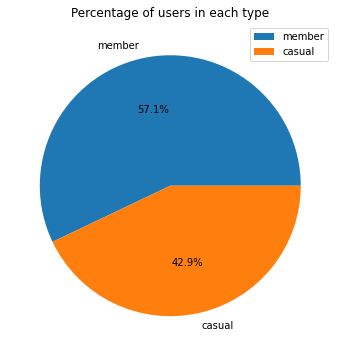

In [47]:
# To plot the pie chart of users in each type
plt.figure(figsize = (8,6))
plt.pie(member_type.values, labels = member_type.index, autopct='%1.1f%%')
plt.title("Percentage of users in each type")
plt.legend(member_type.index)
plt.show()

In [48]:
# To check the number of users over years
users_over_year = final_file.groupby('year')['member_casual'].value_counts()
users_over_year

year  member_casual
2020  member           1347894
      casual            987434
2021  member            949789
      casual            740386
Name: member_casual, dtype: int64

In [49]:
# To segregate the number of users into member or casual riders over the years
list_year = []
list_x = []
list_y = list(users_over_year.values)
for i, j in users_over_year.index:
  list_x.append(j)
  list_year.append(str(i))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count of Member and Casual Riders over the years')

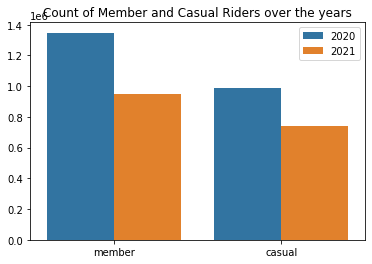

In [50]:
sns.barplot(list_x, list_y, hue = list_year)
plt.title("Count of Member and Casual Riders over the years")

In [51]:
# To check the number of users over months
users_over_month = final_file.groupby('month')['member_casual'].value_counts()
users_over_month

month  member_casual
1      member            68819
       casual            14690
2      member            34383
       casual             8613
3      member           130049
       casual            75642
4      member           177787
       casual           120420
5      member           234165
       casual           216829
6      member           304586
       casual           304192
7      member           281692
       casual           268733
8      member           325504
       casual           283006
9      member           285090
       casual           215300
10     member           216493
       casual           122810
11     member           149756
       casual            73033
12     member            89359
       casual            24552
Name: member_casual, dtype: int64

In [52]:
# To segregate the number of users into member or casual riders over the months
list_month = []
list_x = []
list_y = list(users_over_month.values)
for i, j in users_over_month.index:
  list_x.append(j)
  list_month.append(str(i))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count of Member and Casual Riders over the months')

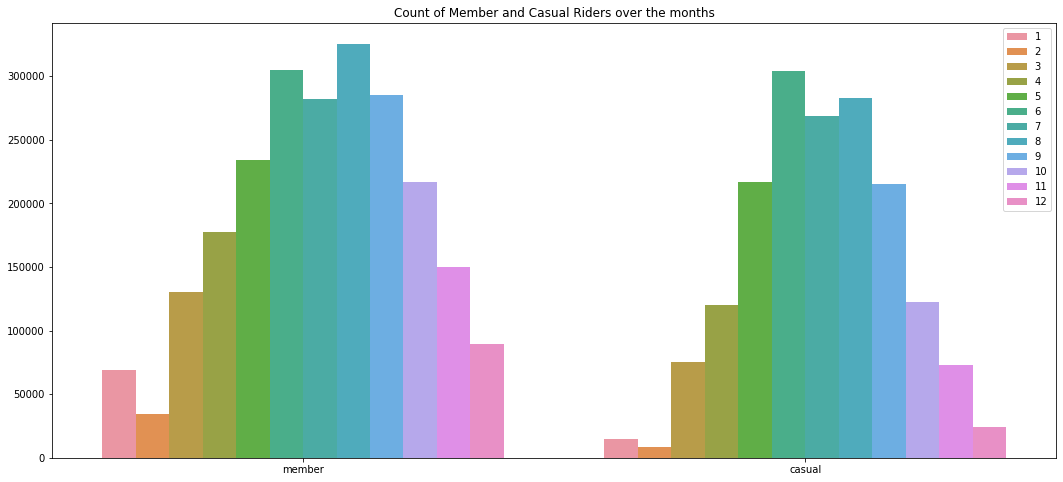

In [53]:
# Plot count of Member and Casual Riders over the months
plt.figure(figsize = (18,8))
sns.barplot(list_x, list_y, hue = list_month)
plt.title("Count of Member and Casual Riders over the months")

In [54]:
# To check the number of users for a particulat rideable_type
ride_type = final_file.groupby("member_casual")["rideable_type"].value_counts()
ride_type

member_casual  rideable_type
casual         docked_bike       969539
               classic_bike      451826
               electric_bike     306455
member         docked_bike      1077368
               classic_bike      823033
               electric_bike     397282
Name: rideable_type, dtype: int64

In [55]:
# To segregate the number of users into member or casual riders based on ride type
list_member = []
list_x = []
list_y = list(ride_type.values)
for i, j in ride_type.index:
  list_x.append(j)
  list_member.append(str(i))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count of Member and Casual Riders over the months')

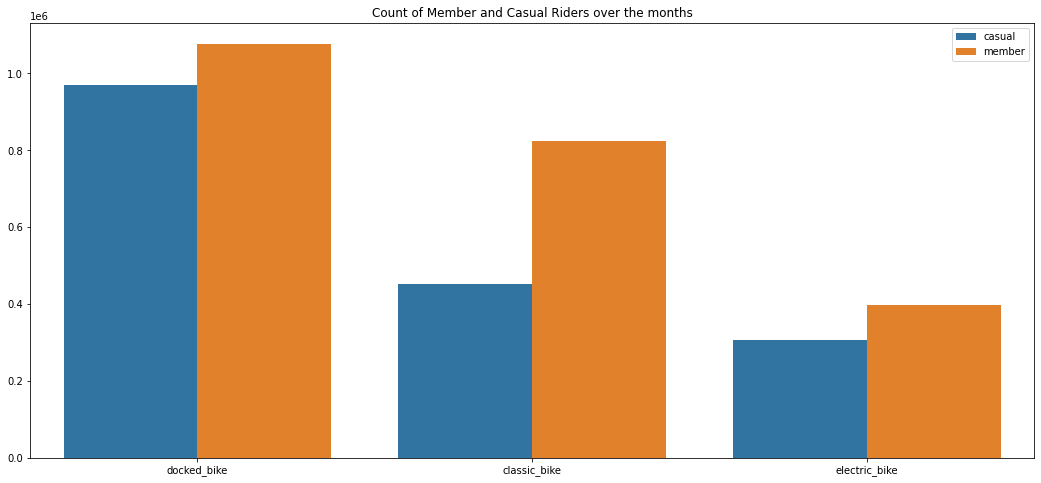

In [56]:
# To plot number of users into member or casual riders based on ride type
plt.figure(figsize = (18,8))
sns.barplot(list_x, list_y, hue = list_member)
plt.title("Count of Member and Casual Riders over the months")
